In [7]:
# 核心資料處理套件
import pandas as pd
import numpy as np

# 資料視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns

# 資料預處理與模型建構套件
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 全域設定：中文字體 + 關閉 warnings
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False

# 載入資料集
try:
    df = pd.read_csv('../data/creditcard.csv')
    print("資料載入成功！")
except FileNotFoundError:
    print("錯誤：找不到 'creditcard.csv' 檔案，請確認檔案路徑是否正確。")
    # 如果檔案真的不存在，程式會在此停止，並提醒你檢查檔案。

資料載入成功！


In [8]:
# 顯示前 5 筆資料，確認格式正確
# print("前 5 筆資料：")
# print(df.head())

# 顯示資料的基本資訊，檢查欄位型態與是否有遺失值
# print("\n資料基本資訊：")
# df.info()

# 檢查目標變數 'Class' 的分佈
# 'Class' = 0 代表正常交易, 'Class' = 1 代表詐欺交易
print("\n'Class' 類別分佈：")
print(df['Class'].value_counts())
print(f"詐欺交易佔總交易數的比例：{round(df['Class'].value_counts()[1]/len(df) * 100, 2)}%")




'Class' 類別分佈：
Class
0    284315
1       492
Name: count, dtype: int64
詐欺交易佔總交易數的比例：0.17%


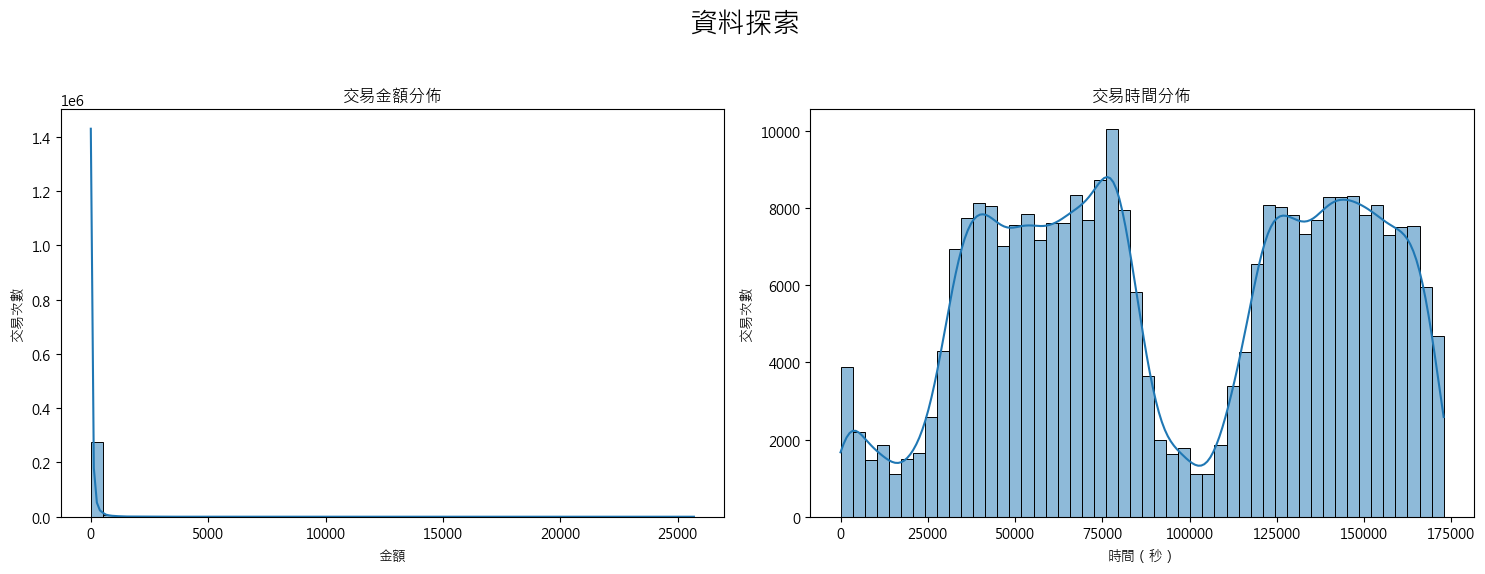

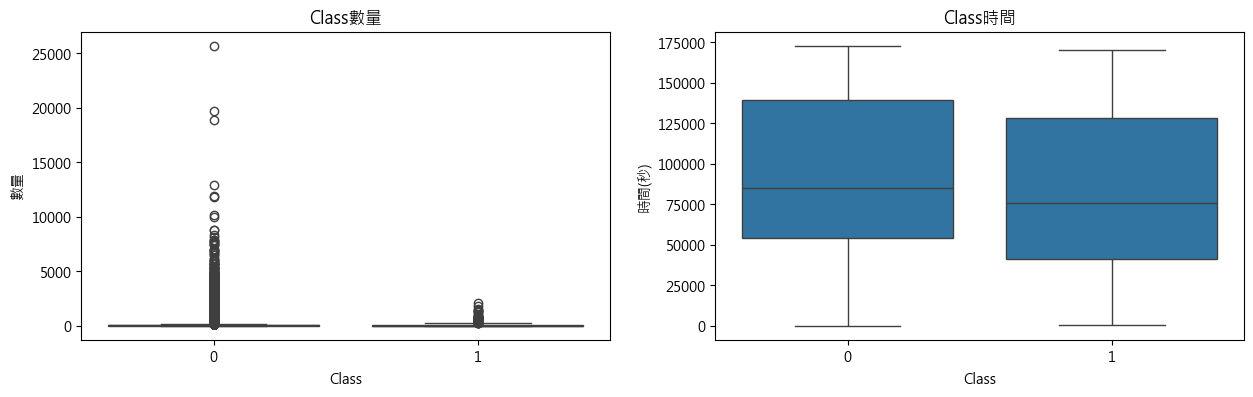

In [22]:
# 資料視覺化：交易金額與時間的分佈
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
sns.histplot(df['Amount'], bins=50, ax=ax1, kde=True)
ax1.set_title('交易金額分佈')
ax1.set_xlabel('金額')
ax1.set_ylabel('交易次數')

sns.histplot(df['Time'], bins=50, ax=ax2, kde=True)
ax2.set_title('交易時間分佈')
ax2.set_xlabel('時間（秒）')
ax2.set_ylabel('交易次數')

plt.suptitle("資料探索", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 比較詐欺 (Class=1) 與非詐欺 (Class=0) 的 Amount/Time 分佈
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(x='Class', y='Amount', data=df, ax=ax[0])
ax[0].set_title('Class數量')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('數量')
sns.boxplot(x='Class', y='Time', data=df, ax=ax[1])
ax[1].set_title('Class時間')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('時間(秒)')
plt.show()

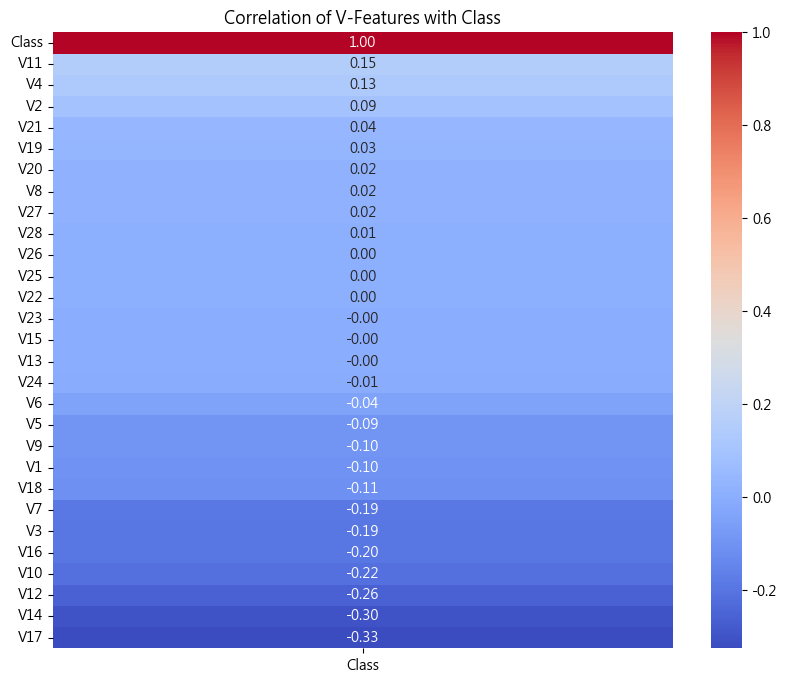

In [23]:
# 觀察特徵與目標變數 (Class) 的相關性
v_features = [f'V{i}' for i in range(1, 29)]
correlations = df[v_features + ['Class']].corr()

plt.figure(figsize=(10, 8))
# 只看與 Class 的相關性
sns.heatmap(correlations[['Class']].sort_values(by='Class', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of V-Features with Class')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

# 1. 處理 Time 和 Amount (標準化)
# V features 已經是 PCA 轉換過，通常不需要進一步處理
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# 移除原始 Time 和 Amount
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# 2. 定義特徵 (X) 和目標 (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 3. 分割訓練集與測試集
from sklearn.model_selection import train_test_split
# stratify=y 是處理不平衡資料的關鍵！確保訓練集和測試集有相似的詐欺比例
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set 詐欺比例: {y_train.mean():.4f}")
print(f"Test set 詐欺比例: {y_test.mean():.4f}")

Train set 詐欺比例: 0.0017
Test set 詐欺比例: 0.0017
